## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "None"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

## MOMENTUM = 0.8, and use nesterov.

In [11]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.8

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0716 18:32:09.439279  4992 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 18:32:09.442280  4992 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0716 18:32:09.538301  4992 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0716 18:32:09.705339  4992 deprecation.py:323] From C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 179us/step - loss: 2.1152 - acc: 0.2229 - val_loss: 1.8655 - val_acc: 0.3328
Epoch 2/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.8913 - acc: 0.3160 - val_loss: 1.8059 - val_acc: 0.3458
Epoch 3/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.7662 - acc: 0.3638 - val_loss: 1.7808 - val_acc: 0.3560
Epoch 4/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.6939 - acc: 0.3882 - val_loss: 1.8040 - val_acc: 0.3564
Epoch 5/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.6559 - acc: 0.4048 - val_loss: 1.7478 - val_acc: 0.3736
Epoch 6/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.6306 - acc: 0.4144 - val_loss: 1.6366 - val_acc: 0.4097
Epoch 7/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.5875 - acc: 0.4300 - val_loss: 1.5882 - 

50000/50000 [==============================] - 6s 124us/step - loss: 1.8968 - acc: 0.3236 - val_loss: 1.7784 - val_acc: 0.3639
Epoch 2/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.7091 - acc: 0.3927 - val_loss: 1.7105 - val_acc: 0.4026
Epoch 3/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.6299 - acc: 0.4239 - val_loss: 1.6670 - val_acc: 0.4082
Epoch 4/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.5664 - acc: 0.4487 - val_loss: 1.7385 - val_acc: 0.3903
Epoch 5/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.5241 - acc: 0.4617 - val_loss: 1.5963 - val_acc: 0.4248
Epoch 6/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.4850 - acc: 0.4785 - val_loss: 1.5556 - val_acc: 0.4420
Epoch 7/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.4473 - acc: 0.4880 - val_loss: 1.5277 - val_acc: 0.4534
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 6s 123us/step - loss: 1.9665 - acc: 0.3151 - val_loss: 1.9213 - val_acc: 0.3211
Epoch 3/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.8875 - acc: 0.3406 - val_loss: 1.8630 - val_acc: 0.3453
Epoch 4/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.8390 - acc: 0.3594 - val_loss: 1.8199 - val_acc: 0.3633
Epoch 5/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.8030 - acc: 0.3724 - val_loss: 1.7901 - val_acc: 0.3774
Epoch 6/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.7722 - acc: 0.3838 - val_loss: 1.7605 - val_acc: 0.3913
Epoch 7/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.7463 - acc: 0.3930 - val_loss: 1.7376 - val_acc: 0.3963
Epoch 8/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.7237 - acc: 0.4009 - val_loss: 1.7172 - val_acc: 0.4038
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 6s 118us/step - loss: 2.2074 - acc: 0.2020 - val_loss: 2.1923 - val_acc: 0.2055
Epoch 4/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.1788 - acc: 0.2184 - val_loss: 2.1657 - val_acc: 0.2186
Epoch 5/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.1536 - acc: 0.2291 - val_loss: 2.1420 - val_acc: 0.2311
Epoch 6/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.1305 - acc: 0.2386 - val_loss: 2.1198 - val_acc: 0.2394
Epoch 7/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.1092 - acc: 0.2463 - val_loss: 2.0996 - val_acc: 0.2483
Epoch 8/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.0896 - acc: 0.2548 - val_loss: 2.0811 - val_acc: 0.2565
Epoch 9/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.0715 - acc: 0.2607 - val_loss: 2.0640 - val_acc: 0.2630
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 6s 117us/step - loss: 2.3194 - acc: 0.0975 - val_loss: 2.3133 - val_acc: 0.0977
Epoch 5/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.3096 - acc: 0.1022 - val_loss: 2.3042 - val_acc: 0.1028
Epoch 6/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.3014 - acc: 0.1098 - val_loss: 2.2966 - val_acc: 0.1114
Epoch 7/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.2945 - acc: 0.1176 - val_loss: 2.2901 - val_acc: 0.1222
Epoch 8/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.2883 - acc: 0.1259 - val_loss: 2.2841 - val_acc: 0.1311
Epoch 9/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.2827 - acc: 0.1329 - val_loss: 2.2785 - val_acc: 0.1388
Epoch 10/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.2774 - acc: 0.1414 - val_loss: 2.2732 - val_acc: 0.1472
Epoch 11/50
50000/50000 [===================

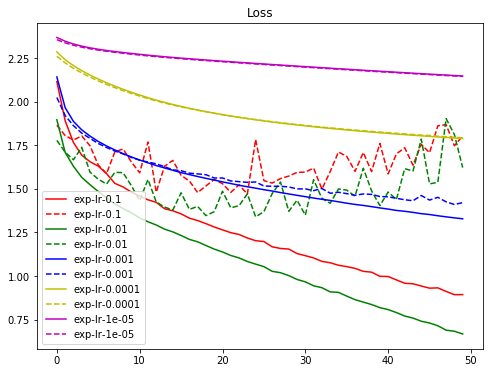

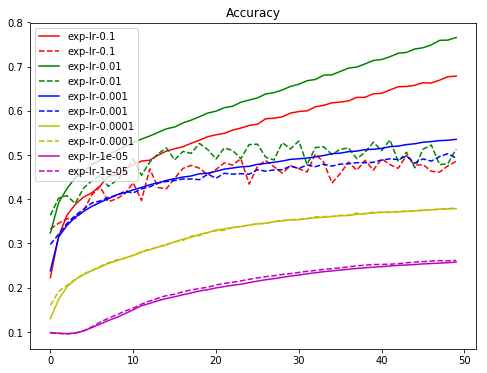

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## MOMENTUM = 0.8, no nesterov.

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.9158 - acc: 0.3165 - val_loss: 1.8104 - val_acc: 0.3545
Epoch 2/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.7235 - acc: 0.3906 - val_loss: 1.6930 - val_acc: 0.4064
Epoch 3/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.6296 - acc: 0.4215 - val_loss: 1.6138 - val_acc: 0.4249
Epoch 4/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.5784 - acc: 0.4422 - val_loss: 1.5596 - val_acc: 0.4424
Epoch 5/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.5305 - acc: 0.4582 - val_loss: 1.5905 - val_acc: 0.4416
Epoch 6/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.4885 - acc: 0.4718 - val_loss: 1.5231 - val_acc: 0.4565
Epoch 7/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.4543 - acc: 0.4842 - val_loss: 1.5599 - 

Epoch 2/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.9420 - acc: 0.3197 - val_loss: 1.9011 - val_acc: 0.3306
Epoch 3/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.8717 - acc: 0.3459 - val_loss: 1.8514 - val_acc: 0.3527
Epoch 4/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.8295 - acc: 0.3603 - val_loss: 1.8148 - val_acc: 0.3632
Epoch 5/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.7952 - acc: 0.3720 - val_loss: 1.7837 - val_acc: 0.3778
Epoch 6/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.7673 - acc: 0.3831 - val_loss: 1.7571 - val_acc: 0.3874
Epoch 7/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.7439 - acc: 0.3910 - val_loss: 1.7355 - val_acc: 0.3978
Epoch 8/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.7217 - acc: 0.3995 - val_loss: 1.7193 - val_acc: 0.4020
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 6s 116us/step - loss: 2.2046 - acc: 0.2292 - val_loss: 2.1889 - val_acc: 0.2354
Epoch 4/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.1781 - acc: 0.2427 - val_loss: 2.1636 - val_acc: 0.2502
Epoch 5/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.1536 - acc: 0.2545 - val_loss: 2.1400 - val_acc: 0.2599
Epoch 6/50
50000/50000 [==============================] - 6s 114us/step - loss: 2.1304 - acc: 0.2636 - val_loss: 2.1177 - val_acc: 0.2683
Epoch 7/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.1085 - acc: 0.2730 - val_loss: 2.0968 - val_acc: 0.2782
Epoch 8/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.0881 - acc: 0.2796 - val_loss: 2.0773 - val_acc: 0.2845
Epoch 9/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.0691 - acc: 0.2869 - val_loss: 2.0596 - val_acc: 0.2885
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 6s 116us/step - loss: 2.2957 - acc: 0.1282 - val_loss: 2.2907 - val_acc: 0.1282
Epoch 5/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.2860 - acc: 0.1316 - val_loss: 2.2821 - val_acc: 0.1321
Epoch 6/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.2783 - acc: 0.1352 - val_loss: 2.2750 - val_acc: 0.1360
Epoch 7/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.2718 - acc: 0.1376 - val_loss: 2.2690 - val_acc: 0.1388
Epoch 8/50
50000/50000 [==============================] - 6s 130us/step - loss: 2.2660 - acc: 0.1414 - val_loss: 2.2635 - val_acc: 0.1424
Epoch 9/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.2609 - acc: 0.1448 - val_loss: 2.2584 - val_acc: 0.1462
Epoch 10/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.2560 - acc: 0.1495 - val_loss: 2.2537 - val_acc: 0.1492
Epoch 11/50
50000/50000 [===================

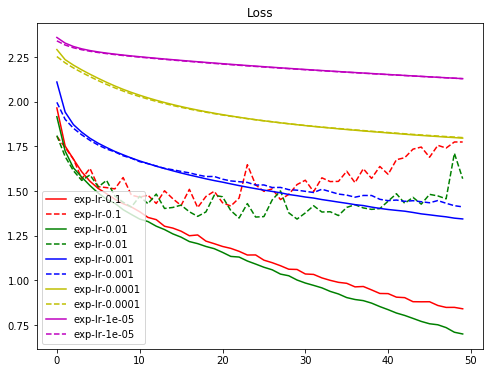

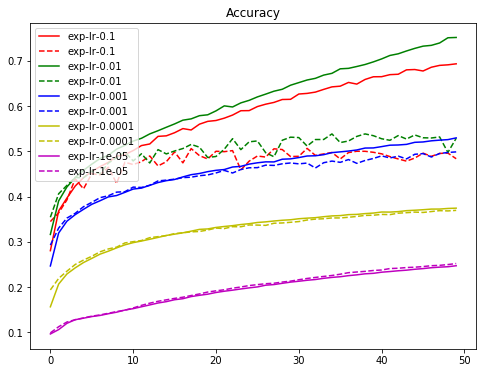

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()